# Sensors data corelation

In [1]:
import matplotlib.pyplot as plt
import time
from scipy.fftpack import fft
from scipy import signal
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from numpy import fft as npfft
import pylab as pl
import numpy as np
import pandas as pd
import datetime
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import lag_plot
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error
from matplotlib import pyplot as plt
from scipy.signal import savgol_filter

# Relationship emong data

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
df=pd.read_csv('data_zero.csv')
path = 'data_zero.csv'
df=pd.read_csv(path)
# columns_names = df.columns
# df.index = pd.to_datetime(df[columns_names[0]]/1000, unit='s')
# # df.drop(columns[0], axis = 1)
# delite_column = columns_names[0]
# df = df.drop(delite_column, axis = 1) 
# # df.sort_index(inplace= True)
# df.sort_index(inplace= True)
# ---------------
speed = 10
dfx = df[::speed]
# ---------------

In [3]:
def taking_of_nan_values_DF(dfx):
    # interpolation
    dfx = dfx.interpolate(method='linear', limit_direction='forward', axis=0)
    # taking of nullmi
    dfx = dfx.fillna(method='ffill')
    dfx = dfx.fillna(method='bfill')
    return dfx

In [4]:
df = taking_of_nan_values_DF(df)

In [5]:
def shifting_time_sensor_perfect_fit(df):
    first_half=int(len(df)/2)
    i = 0 
    df_first_half = df[:first_half]
    df_first_half = taking_of_nan_values_DF(df_first_half)
    df_first_half_column = []
    df_shift = [] 
    shift_test = int(first_half/10)
    best_shift_nr=0
    np_sqrt_mean_squared_error_min = 0
    np_sqrt_mean_squared_error_best_fitt = [] 
    shift_nr = []
    for i in range(len(df.columns)-3):
        column_start = i+1
        column_end = i+3       
        df_first_half_column_first = df_first_half[df_first_half.columns[column_start]]
        df_first_half_column_second = df_first_half[df_first_half.columns[column_end]]
        for shift_step in range((-1)*shift_test,shift_test,1):            
            df_shift_second = df_first_half_column_second.shift(shift_step)
            df_shift_second = taking_of_nan_values_DF(df_shift_second)


            # Evaluation Metrics
            mean_absolute_error_value = mean_absolute_error(df_first_half_column_first,df_shift_second)
    #             print("mean_absolute_error_value: ", mean_absolute_error_value)

            mean_squared_error_value = mean_squared_error(df_first_half_column_first,df_shift_second)
    #             print("mean_squared_error_value: ", mean_squared_error_value)

            np_sqrt_mean_squared_error =np.sqrt(mean_squared_error(df_first_half_column_first,df_shift_second))
    #         print( "shift_step: ", shift_step, "  np_sqrt_mean_squared_error: ", np_sqrt_mean_squared_error )

            if np_sqrt_mean_squared_error_min == 0:
                np_sqrt_mean_squared_error_min = np_sqrt_mean_squared_error
            if np_sqrt_mean_squared_error_min > np_sqrt_mean_squared_error:
                np_sqrt_mean_squared_error_min = np_sqrt_mean_squared_error
                best_shift_nr = shift_step
                
            i=i+1
        df_first = df[df.columns[column_start]]
        df_first = df_first - df_first[0]
        df_second = df[df.columns[column_end]].shift(best_shift_nr)
        df_second = df_second - df_second[0]
        df_first_mean = df_first[:first_half].mean()
        df_second_mean = df_second[:first_half].mean()
        df_second = df_second * df_first_mean/df_second_mean
        
        print('best_shift_nr = ', best_shift_nr,  'np_sqrt_mean_squared_error_min =', np_sqrt_mean_squared_error_min)
        plt.figure(figsize=(20, 10))
        plt.plot(df_first,label=df.columns[column_start])
        plt.plot(df_second, label=df.columns[column_end])
        plt.title('Shifting_time_sensor_perfect_fit_'+ df.columns[column_start] + "-" + df.columns[column_end])
        plt.xlabel('time')
        plt.ylabel('Value')
        plt.grid()
        plt.show()


best_shift_nr =  -209 np_sqrt_mean_squared_error_min = 0.011039883666476832


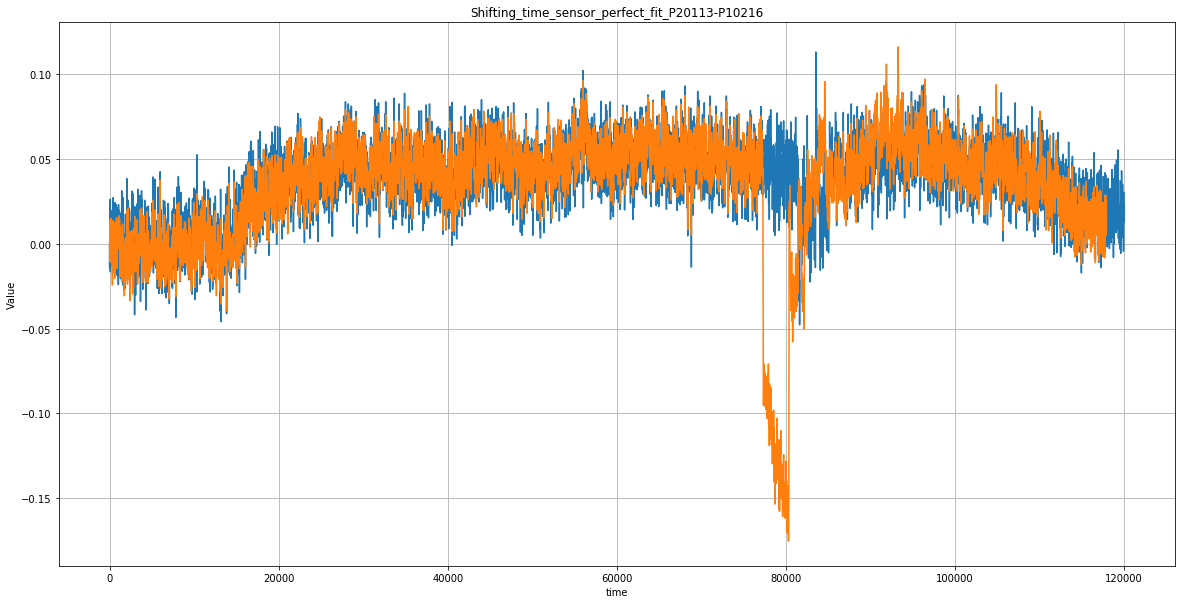

best_shift_nr =  -209 np_sqrt_mean_squared_error_min = 0.011039883666476832


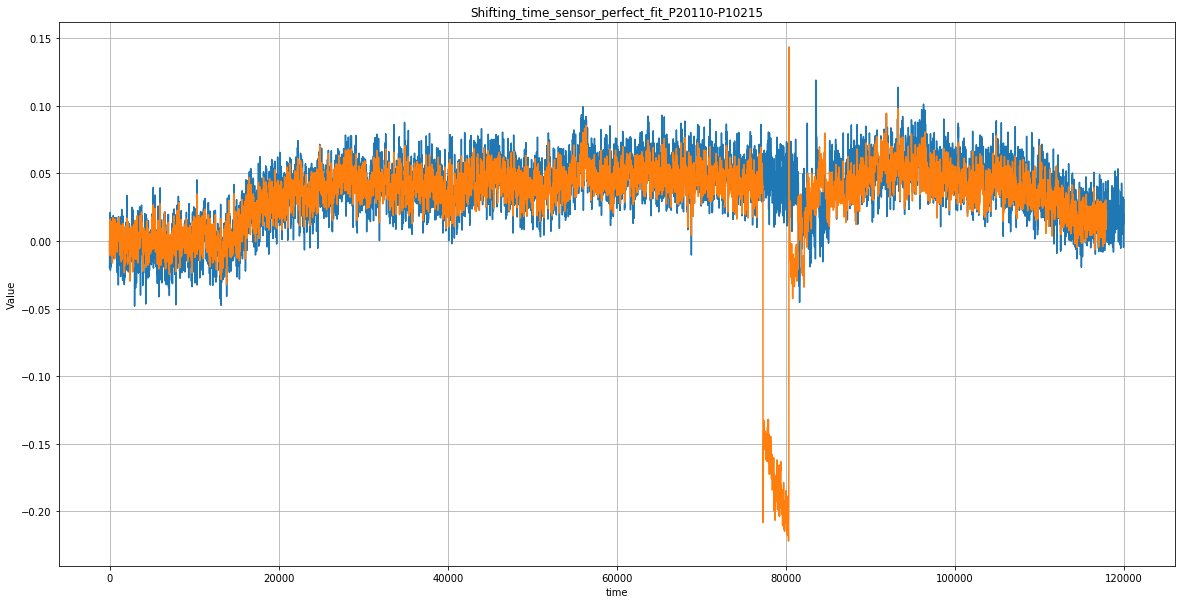

best_shift_nr =  -209 np_sqrt_mean_squared_error_min = 0.011039883666476832


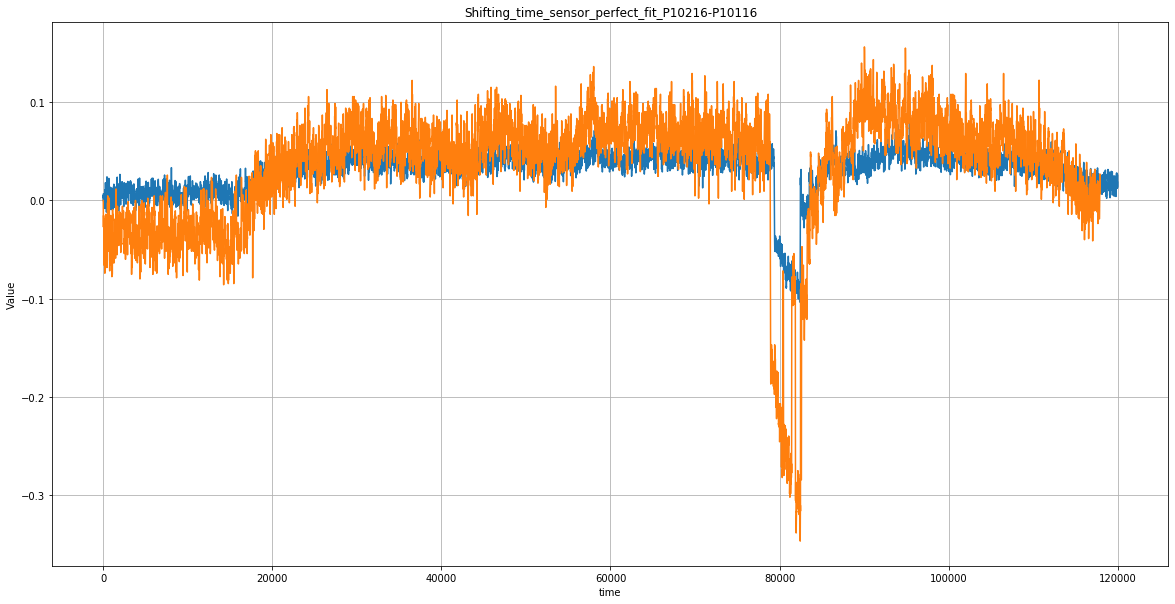

best_shift_nr =  -209 np_sqrt_mean_squared_error_min = 0.011039883666476832


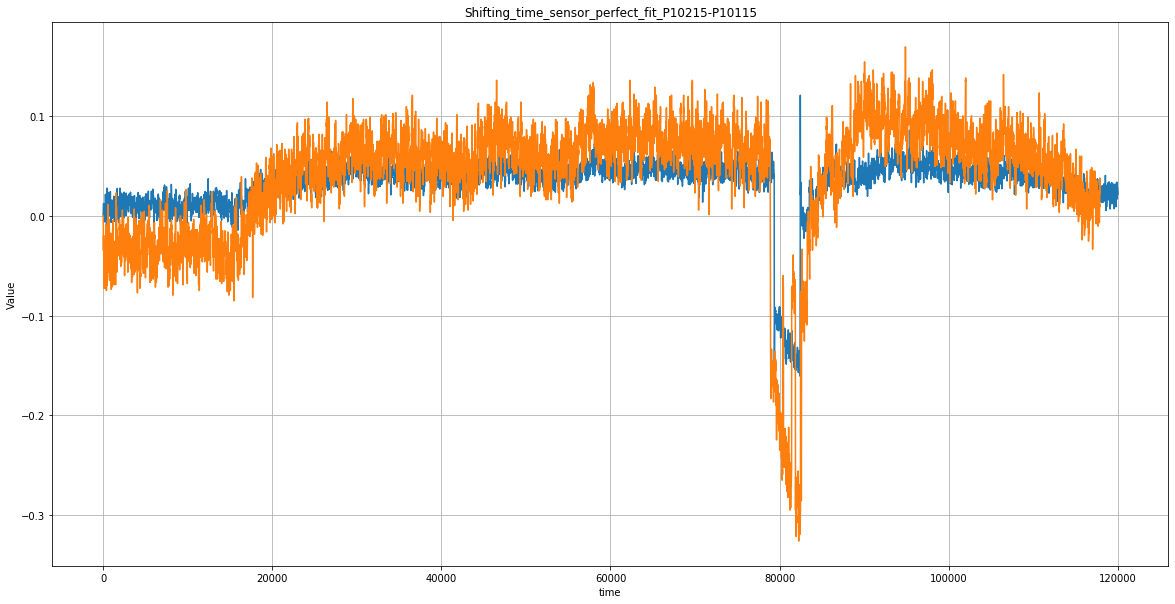

best_shift_nr =  -209 np_sqrt_mean_squared_error_min = 0.011039883666476832


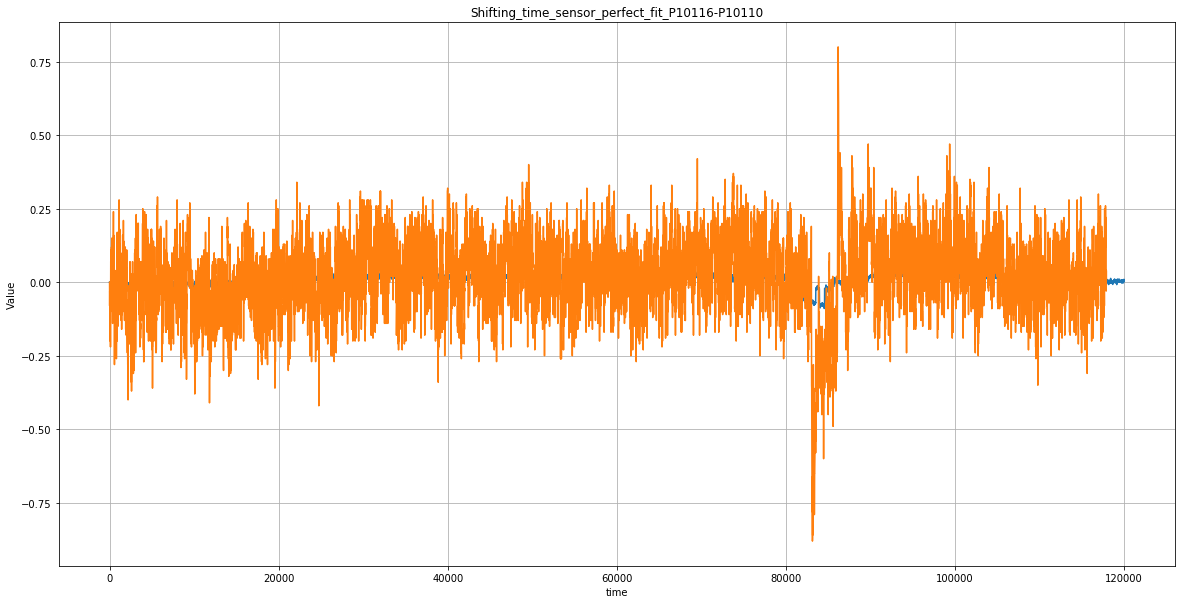

best_shift_nr =  -209 np_sqrt_mean_squared_error_min = 0.011039883666476832


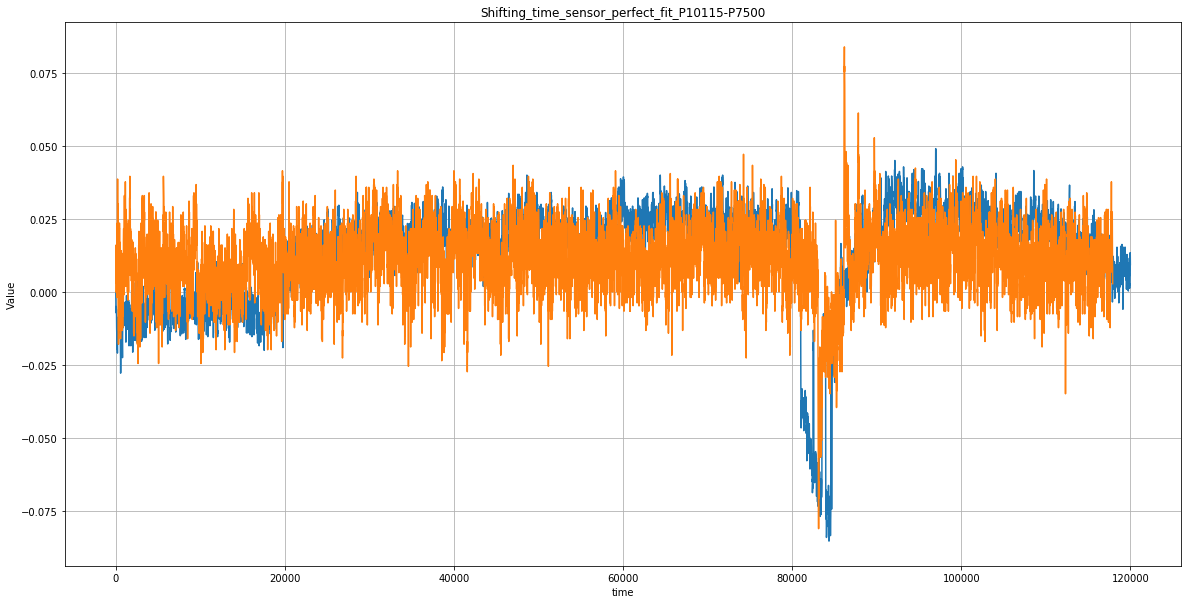

In [6]:
shifting_time_sensor_perfect_fit(dfx)